# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

# Открываю файл как ДФ, выкидываю index

In [3]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',\
                              'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',\
                              'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)

# Убираю дубликаты, выкидываю третий гендер), ресечу индексы

In [4]:
data = data.drop_duplicates()
data.drop(index=data.index[0], axis = 0, inplace = True)
data = data.drop(data[data['gender'] == 'Other'].index[0], axis = 0)
data = data.reset_index(drop = True)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# На вход подается ДФ и все пропущенные значения заполняются модой. Функция возвращает измененный ДФ.
### Не знаю, на сколько этот шаг оправдан, но я не супер парился

In [5]:
def fill_mode(data):
    col = {'numbers': ['age','hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'stroke'], \
           'cat' : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']}

    for i in col['numbers']:
        data[i] = data[i].astype('float64')
        data[i].fillna(data[i].mode()[0], inplace = True)
    for i in col['cat']:
        data[i].fillna(data[i].mode()[0], inplace = True)
    return data



fill_mode(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5105 non-null   object 
 1   age                5105 non-null   float64
 2   hypertension       5105 non-null   float64
 3   heart_disease      5105 non-null   float64
 4   ever_married       5105 non-null   object 
 5   work_type          5105 non-null   object 
 6   Residence_type     5105 non-null   object 
 7   avg_glucose_level  5105 non-null   float64
 8   bmi                5105 non-null   float64
 9   smoking_status     5105 non-null   object 
 10  stroke             5105 non-null   float64
dtypes: float64(6), object(5)
memory usage: 438.8+ KB


# Такой же принцип, как и в создании предыдущей функции
### Только тут среднем заполняются числинные значения, а не категориальные. Категориальные заполняются модой

In [73]:
def fill_avg(data):
    col = {'numbers': ['age','hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'stroke'], \
           'cat' : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']}

    for i in col['numbers']:
        data[i] = data[i].astype('float64')
        data[i].fillna(round(data[i].mean()), inplace = True)
    for i in col['cat']:
        data[i].fillna(data[i].mode()[0], inplace = True)
    return data



fill_avg(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   object 
 1   age                5106 non-null   float64
 2   hypertension       5106 non-null   float64
 3   heart_disease      5106 non-null   float64
 4   ever_married       5106 non-null   object 
 5   work_type          5106 non-null   object 
 6   Residence_type     5106 non-null   object 
 7   avg_glucose_level  5106 non-null   float64
 8   bmi                5106 non-null   float64
 9   smoking_status     5106 non-null   object 
 10  stroke             5106 non-null   float64
dtypes: float64(6), object(5)
memory usage: 438.9+ KB


# Тут я просто выполняю выведение всех данных, чтобы показать, что функции работают

Counter({'Female': 2990, 'Male': 2115})
Counter({0.0: 4632, 1.0: 473})
Counter({0.0: 4875, 1.0: 230})
Counter({'Yes': 3350, 'No': 1755})
Counter({'Private': 3058, 'Self-employed': 771, 'children': 629, 'Govt_job': 625, 'Never_worked': 22})
Counter({'Urban': 2972, 'Rural': 2133})
Counter({'never smoked': 1892, 'Unknown': 1543, 'formerly smoked': 884, 'smokes': 786})
Counter({0.0: 4856, 1.0: 249})


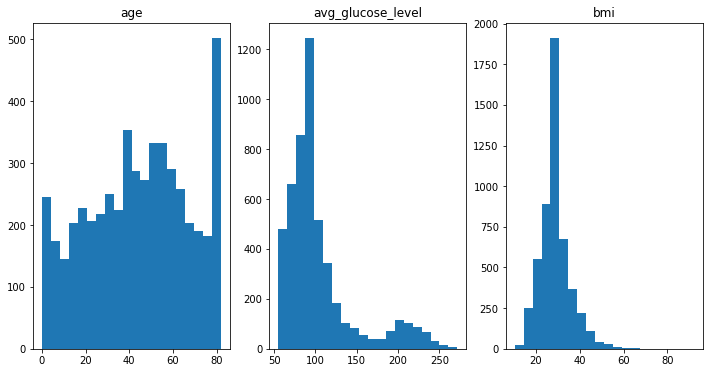

In [42]:
for i in data:
    if i != 'age' and i != 'avg_glucose_level' and i != 'bmi':
        print(Counter(data[i]))
count = 1  
plt.figure(figsize=(12,6))
for i in ['age', 'avg_glucose_level', 'bmi']:
    plt.subplot(1,3, count)
    plt.title(i)
    plt.hist(data[i], bins=20)
    count += 1

# Создаю столбец таргет и таблицу для БэЙсЛаЙн МоДеЛи...

In [75]:
tr = data['stroke']
data_without_tr = data.drop('stroke', axis = 1)
data_without_tr.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,29.0,formerly smoked
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,29.0,never smoked
2,Male,80.0,0.0,1.0,Yes,Private,Urban,105.92,32.5,never smoked
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked


# Применяю ординал энкодинг к столбцам категориальным

In [76]:
data_without_tr[['gender', 'smoking_status','ever_married','work_type', 'Residence_type']] = \
OrdinalEncoder().fit_transform(data_without_tr[['gender', 'smoking_status','ever_married','work_type', 'Residence_type']])
data_without_tr.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,29.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,29.0,2.0
2,1.0,80.0,0.0,1.0,1.0,2.0,1.0,105.92,32.5,2.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0


# Делю на тестовую и тренировачную выборки

In [77]:
train, test, target_train, target_test = train_test_split(
    data_without_tr, tr, test_size=0.2, random_state=12345)

# Логистическая регрессия

In [78]:
clf_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=500)
clf_log.fit(train, target_train)
pred_log = clf_log.predict(test)
f_1_log = f1_score(target_test, pred_log, average='weighted', labels=np.unique(pred_log))
precision = precision_score(target_test, pred_log, average='weighted', labels=np.unique(pred_log))
recall = recall_score(target_test, pred_log, average='weighted', labels=np.unique(pred_log))
accuracy_log = accuracy_score(target_test, pred_log)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(f_1_log, precision, recall, accuracy_log))

Значение F1 = 0.9707955689828802, значение precision = 0.9432485322896281, значение recall = 1.0, значение accuracy = 0.9432485322896281


# Перцептрон

In [79]:
Perc = Perceptron(random_state=12345)
Perc.fit(train, target_train)
pred_log = Perc.predict(test)
f_1_log = f1_score(target_test, pred_log, average='weighted', labels=np.unique(pred_log))
precision = precision_score(target_test, pred_log, average='weighted', labels=np.unique(pred_log))
recall = recall_score(target_test, pred_log, average='weighted', labels=np.unique(pred_log))
accuracy_log = accuracy_score(target_test, pred_log)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(f_1_log, precision, recall, accuracy_log))

Значение F1 = 0.9009244919958154, значение precision = 0.9080869039580328, значение recall = 0.8943248532289628, значение accuracy = 0.8943248532289628


# Часть с исследованием
# Как влияет курение на риск инсульта у мужчин и женщин

never smoked man 4.25
never smoked women 5.4
---
Unknown man 3.21
Unknown women 3.09
---
formerly smoked man 9.7
formerly smoked women 7.67
---
smokes man 7.32
smokes women 4.42
---


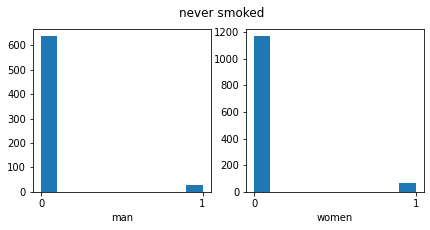

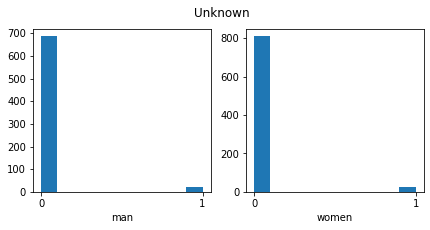

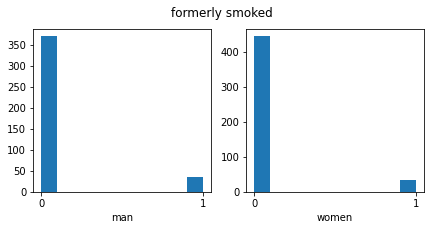

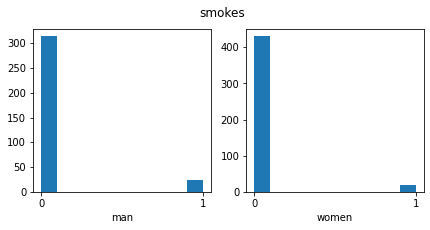

In [24]:
for i in ['never smoked', 'Unknown', 'formerly smoked', 'smokes']:
    tmp_df = data[data['smoking_status'] == i]
    man = tmp_df[tmp_df['gender'] == 'Male']
    women = tmp_df[tmp_df['gender'] == 'Female']
    stroke_man = man['stroke']
    stroke_women = women['stroke']

    fig = plt.figure(figsize=(7,3))
    fig.suptitle(i)

    plt.subplot(1,2,1)
    plt.xlabel('man')
    plt.xticks([0,1])
    plt.hist(stroke_man)

    plt.subplot(1,2,2)
    plt.xlabel('women')
    plt.xticks([0,1])
    plt.hist(stroke_women)
    print(i, 'man',round((Counter(stroke_man)[1]/Counter(stroke_man)[0] * 100), 2))
    print(i, 'women',round((Counter(stroke_women)[1]/Counter(stroke_women)[0] * 100), 2))
    print('---')

# Влияние среды обитания

Urban man 5.41
Urban women 5.06
---
Rural man 5.34
Rural women 4.8
---


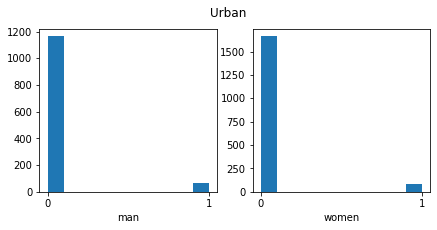

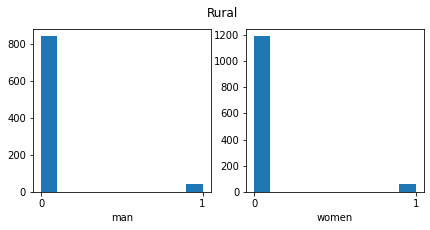

In [25]:
for i in ['Urban','Rural']:
    tmp_df = data[data['Residence_type'] == i]
    man = tmp_df[tmp_df['gender'] == 'Male']
    women = tmp_df[tmp_df['gender'] == 'Female']
    stroke_man = man['stroke']
    stroke_women = women['stroke']

    fig = plt.figure(figsize=(7,3))
    fig.suptitle(i)

    plt.subplot(1,2,1)
    plt.xlabel('man')
    plt.xticks([0,1])
    plt.hist(stroke_man)

    plt.subplot(1,2,2)
    plt.xlabel('women')
    plt.xticks([0,1])
    plt.hist(stroke_women)
    print(i, 'man',round((Counter(stroke_man)[1]/Counter(stroke_man)[0] * 100), 2))
    print(i, 'women',round((Counter(stroke_women)[1]/Counter(stroke_women)[0] * 100), 2))
    print('---')

# Зависимость инсульта от индекса массы тела

(10, 15) man 0.0
(10, 15) women 0.0
---
(15, 20) man 0.0
(15, 20) women 1.47
---
(20, 25) man 2.36
(20, 25) women 3.47
---
(25, 30) man 7.2
(25, 30) women 6.73
---
(30, 35) man 6.58
(30, 35) women 5.49
---
(35, 40) man 4.0
(35, 40) women 3.63
---
(40, 45) man 6.85
(40, 45) women 4.38
---
(45, 50) man 16.67
(45, 50) women 3.85
---
(50, 55) man 0.0
(50, 55) women 0.0
---
(55, 60) man 0.0
(55, 60) women 8.33
---


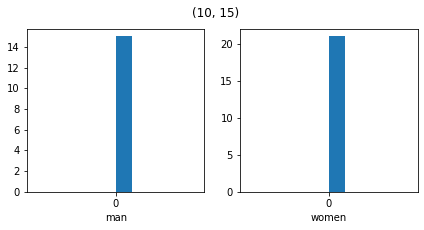

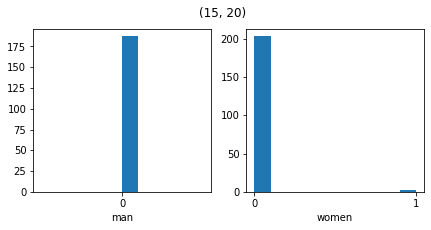

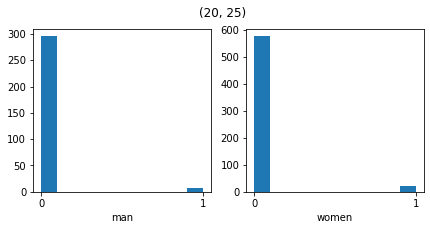

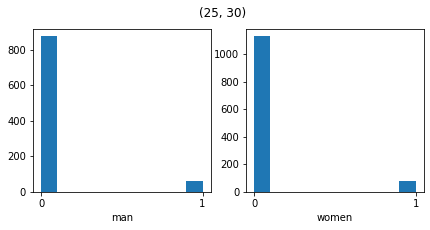

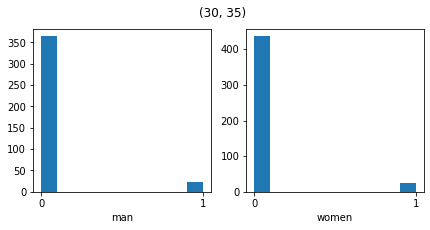

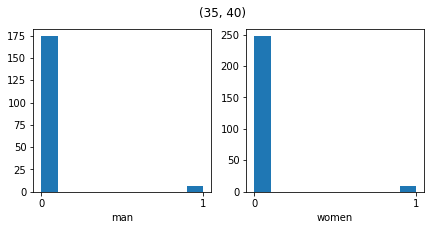

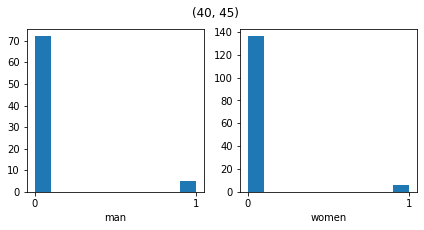

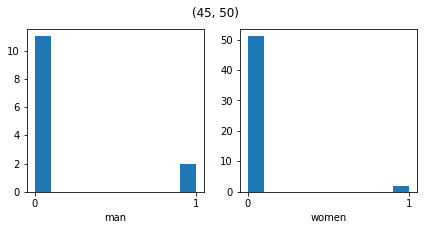

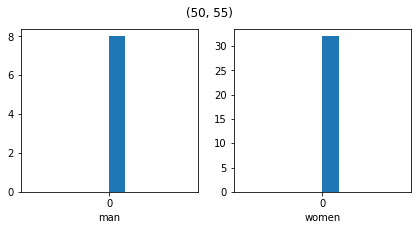

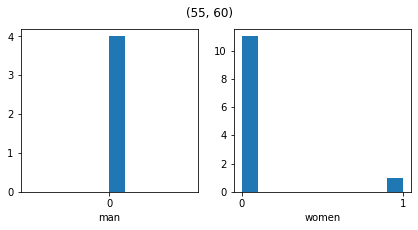

In [41]:
bmi_list = [(i-5,i) for i in range(15,65,5)]
for i in bmi_list:
    tmp_df = data[data['bmi'] >= i[0]]
    tmp_df = tmp_df[tmp_df['bmi'] < i[1]]
    man = tmp_df[tmp_df['gender'] == 'Male']
    women = tmp_df[tmp_df['gender'] == 'Female']
    stroke_man = man['stroke']
    stroke_women = women['stroke']

    fig = plt.figure(figsize=(7,3))
    fig.suptitle(i)

    plt.subplot(1,2,1)
    plt.xlabel('man')
    plt.xticks([0,1])
    plt.hist(stroke_man)

    plt.subplot(1,2,2)
    plt.xlabel('women')
    plt.xticks([0,1])
    plt.hist(stroke_women)
    print(i, 'man',round((Counter(stroke_man)[1]/(Counter(stroke_man)[0]+1) * 100), 2))
    print(i, 'women',round((Counter(stroke_women)[1]/(Counter(stroke_women)[0]+1) * 100), 2))
    print('---')

Судя по всему, у женщин риск инсульта ниже, чем у мужчин. Среда обитания особо не влияет на развитие инсульта. А вот индекс массы тела влияет. Чем он выше, тем выше риск инсульта. Но с определенного индекса (40 - 45) данные становятся нерепрезентативные, потому что выборка мала. Курение тоже оказывает влияние, у пассивных курильщиков даже выше риск. Можно дальше перебирать данные, но я показал, что могу работать и с категориальными и с численными.